In [1]:
#imports

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tqdm import tqdm
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.backend import squeeze
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, concatenate,Permute, Conv2DTranspose
from tensorflow.keras.activations import relu
from sklearn import utils
import wandb
from wandb.keras import WandbCallback
import os
from numpy import array, rec

#Use this if training on a multi-GPU machine
#os.environ["CUDA_VISIBLE_DEVICES"] = "2,3"# Assign which GPU to run on

2.4.1
range(1, 71999)
71998


100%|██████████| 71999/71999 [01:16<00:00, 937.74it/s]


(68399, 80, 240, 1)
(3600, 80, 240, 1)
(68399, 20, 60, 15, 1)
(3600, 20, 60, 15, 1)
(68399, 80, 240, 1)
(3600, 80, 240, 1)
(68399, 20, 60, 15, 1)
(3600, 20, 60, 15, 1)


100%|██████████| 71999/71999 [56:48<00:00, 21.12it/s]


84.0
####
######


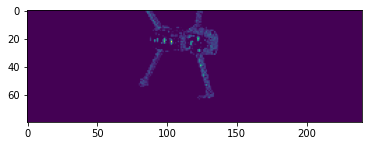

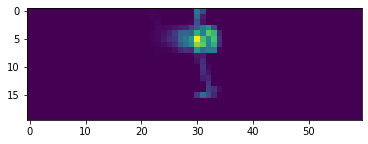

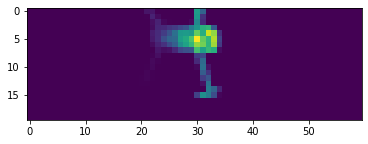

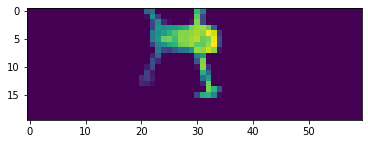

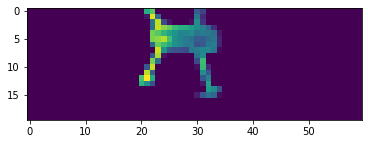

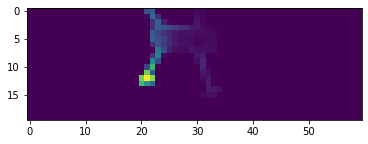

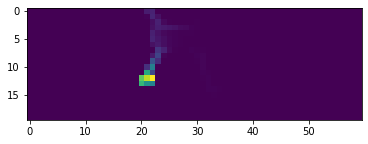

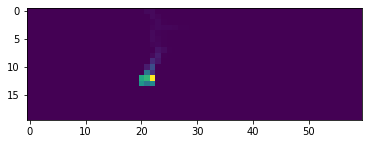

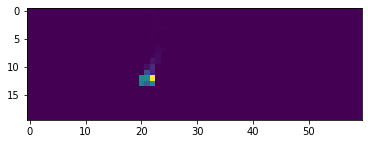

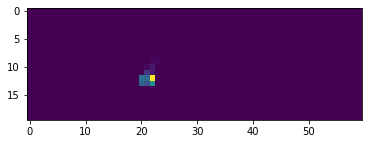

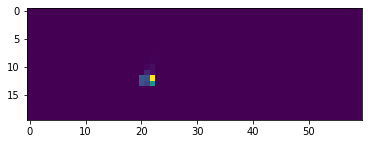

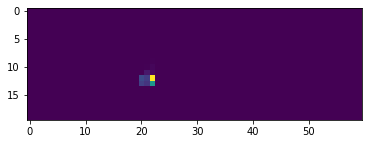

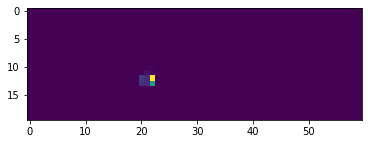

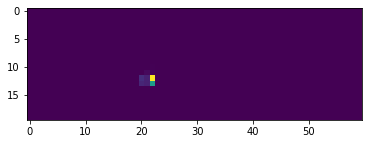

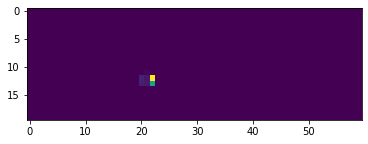

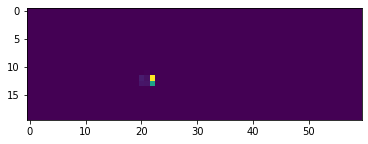

######
0.0
######


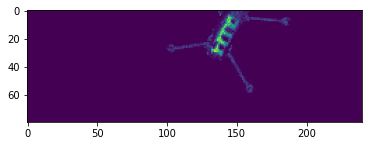

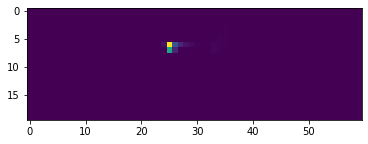

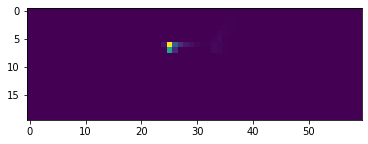

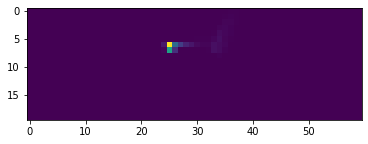

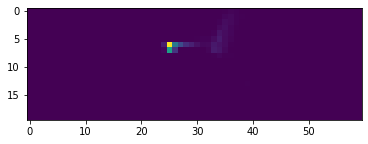

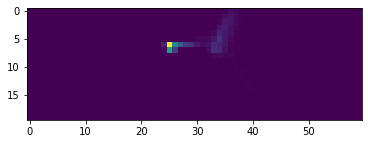

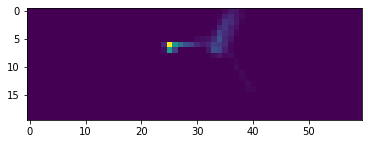

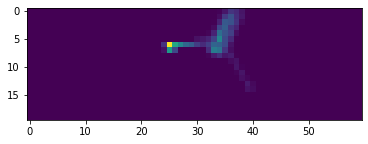

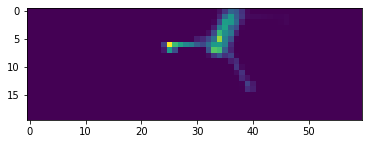

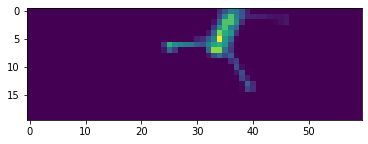

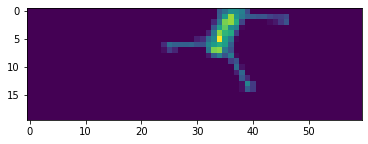

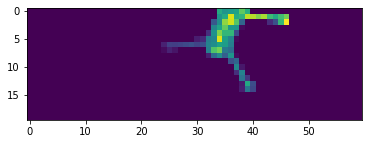

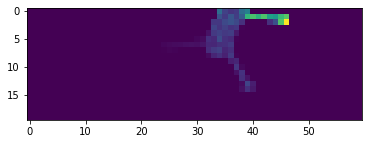

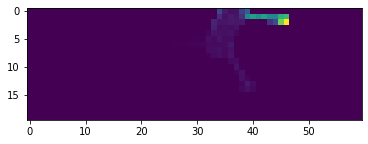

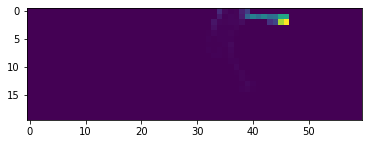

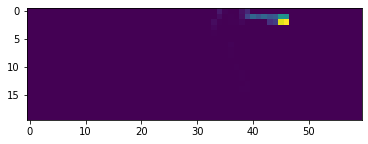

######
0.0
21012172800
19698912000
1105920000
1036800000


In [2]:
#Training and testing data for the first drone
mavic_train_inten_DATADIR = "/Put_File_Path_Here/Training/Intensity/"
mavic_train_label_DATADIR = "/Put_File_Path_Here/Training/Segmentation/"
mavic_train_depth_DATADIR = "/Put_File_Path_Here/Training/Depth/"

mavic_test_inten_DATADIR = "/Put_File_Path_Here/Testing/Intensity/"
mavic_test_label_DATADIR = "/Put_File_Path_Here/Testing/Segmentation/"
mavic_test_depth_DATADIR = "/Put_File_Path_Here/Testing/Depth/"


mavic_inten_training_data = np.zeros((68399,80,240,1))
mavic_inten_testing_data = np.zeros((3600,80,240,1))

#Training and testing data for the second drone
inspire_train_inten_DATADIR = "/Put_File_Path_Here/Training/Intensity/"
inspire_train_label_DATADIR = "/Put_File_Path_Here/Training/Segmentation/"
inspire_train_depth_DATADIR = "/Put_File_Path_Here/Training/Depth/"

inspire_test_inten_DATADIR = "/Put_File_Path_Here/Testing/Intensity/"
inspire_test_label_DATADIR = "/Put_File_Path_Here/Testing/Segmentation/"
inspire_test_depth_DATADIR = "/Put_File_Path_Here/Testing/Depth/"


inspire_inten_training_data = np.zeros((68399,80,240,1))
inspire_inten_testing_data = np.zeros((3600,80,240,1))


start_number_inten_imgs = 1
end_number_inten_imgs = 71999

test_imgs = range(1,3600+1,1)

def create_iten_data():
    count_1 = 0
    count_2 = 0
    for i in tqdm(range(start_number_inten_imgs,end_number_inten_imgs+1,1)):
     
        if i in test_imgs:

            path_0 = mavic_test_inten_DATADIR+str(i)+".bmp"

            img_array = cv2.imread(path_0 ,cv2.IMREAD_GRAYSCALE)
            new_array = img_array[40:120,0:240]#resize images
            mavic_inten_testing_data[count_1,:,:,0] = new_array

            path_0 = inspire_test_inten_DATADIR+str(i)+".bmp"

            img_array = cv2.imread(path_0 ,cv2.IMREAD_GRAYSCALE)
            new_array = img_array[12:92,0:240]#resize images
            inspire_inten_testing_data[count_1,:,:,0] = new_array

            count_1 = count_1+1    
        else:

            path_0 = mavic_train_inten_DATADIR+str(i)+".bmp"

            img_array = cv2.imread(path_0 ,cv2.IMREAD_GRAYSCALE)
            new_array = img_array[40:120,0:240]
            mavic_inten_training_data[count_2,:,:,0] = new_array

            path_0 = inspire_train_inten_DATADIR+str(i)+".bmp"

            img_array = cv2.imread(path_0 ,cv2.IMREAD_GRAYSCALE)
            new_array = img_array[12:92,0:240]
            inspire_inten_training_data[count_2,:,:,0] = new_array

            count_2 = count_2+1


create_iten_data()


mavic_depth_training_data = np.zeros((68399,20,60,15,1))
mavic_depth_testing_data = np.zeros((3600,20,60,15,1))

inspire_depth_training_data = np.zeros((68399,20,60,15,1))
inspire_depth_testing_data = np.zeros((3600,20,60,15,1))

depth_img_original_r = 32
depth_img_original_c = 64 

def create_depth_data():
    count_1 = 0
    count_2 = 0
    for i in tqdm(range(start_number_inten_imgs,end_number_inten_imgs+1,1)):
        
        if i in test_imgs:

            path_0 = mavic_test_depth_DATADIR+str(i)+".csv"

            histo_array = np.loadtxt(path_0, delimiter=',', usecols=range(15))# convert to array
            histo_array = np.reshape(histo_array,(depth_img_original_r,depth_img_original_c,15), order="F") #order "F" means fortran like, makes it work like matlab reshape
            new_array = histo_array[10:30,0:60,:]#adjust image size to match SPAD data

            mavic_depth_testing_data[count_1,:,:,:,0] = new_array

            path_0 = inspire_test_depth_DATADIR+str(i)+".csv"

            histo_array = np.loadtxt(path_0, delimiter=',', usecols=range(15))# convert to array
            histo_array = np.reshape(histo_array,(depth_img_original_r,depth_img_original_c,15), order="F") #order "F" means fortran like, makes it work like matlab reshape
            new_array = histo_array[10:30,0:60,:]#adjust image size to match SPAD data

            inspire_depth_testing_data[count_1,:,:,:,0] = new_array

            count_1 = count_1+1    
        else:

            path_0 = mavic_train_depth_DATADIR+str(i)+".csv"

            histo_array = np.loadtxt(path_0, delimiter=',', usecols=range(15))# convert to array
            histo_array = np.reshape(histo_array,(depth_img_original_r,depth_img_original_c,15), order="F") #order "F" means fortran like, makes it work like matlab reshape
            new_array = histo_array[10:30,0:60,:]#adjust image size to match SPAD data

            mavic_depth_training_data[count_2,:,:,:,0] = new_array


            path_0 = inspire_train_depth_DATADIR+str(i)+".csv"

            histo_array = np.loadtxt(path_0, delimiter=',', usecols=range(15))# convert to array
            histo_array = np.reshape(histo_array,(depth_img_original_r,depth_img_original_c,15), order="F") #order "F" means fortran like, makes it work like matlab reshape
            new_array = histo_array[10:30,0:60,:]#adjust image size to match SPAD data

            inspire_depth_training_data[count_2,:,:,:,0] = new_array

            count_2 = count_2+1


#print(mavic_inten_training_data.shape)
#print(mavic_inten_testing_data.shape)

#print(mavic_depth_training_data.shape)
#print(mavic_depth_testing_data.shape)

#print(inspire_inten_training_data.shape)
#print(inspire_inten_testing_data.shape)

#print(inspire_depth_training_data.shape)
#print(inspire_depth_testing_data.shape)

create_depth_data() #only call once

inten_training_data = np.concatenate((mavic_inten_training_data,inspire_inten_training_data),axis = 0)
inten_testing_data = np.concatenate((mavic_inten_testing_data,inspire_inten_testing_data),axis = 0)

depth_training_data = np.concatenate((mavic_depth_training_data,inspire_depth_training_data),axis = 0)
depth_testing_data = np.concatenate((mavic_depth_testing_data,inspire_depth_testing_data),axis = 0)

np.save('depth_training_data.npy', depth_training_data) # saves the histogram array which is slow to generate, only call once
np.save('depth_testing_data.npy', depth_testing_data)

depth_training_data = np.load('depth_training_data.npy')
depth_testing_data = np.load('depth_testing_data.npy')

mavic_train_labels = np.zeros((68399,1))#0 = mavic

mavic_test_labels = np.zeros((3600,1))#0= mavic

inspire_train_labels = np.ones((68399,1))#0 = mavic

inspire_test_labels = np.ones((3600,1))#0= mavic

train_labels = np.concatenate((mavic_train_labels,inspire_train_labels),axis=0)
test_labels = np.concatenate((mavic_test_labels,inspire_test_labels),axis=0)

#uncomment lines below to view input data

#plt.imshow(inten_training_data[400,:,:,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,0,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,1,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,2,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,3,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,4,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,5,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,6,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,7,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,8,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,9,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,10,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,11,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,12,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,13,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[400,:,:,14,0]*20.0)
#plt.show()

#print(train_labels[400,0])


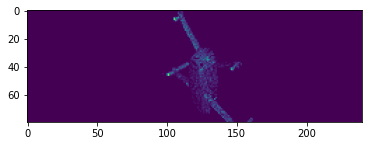

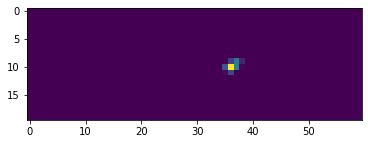

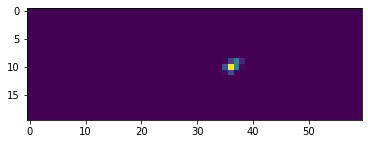

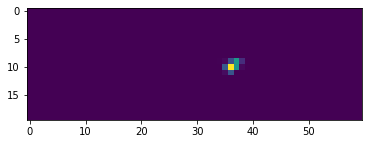

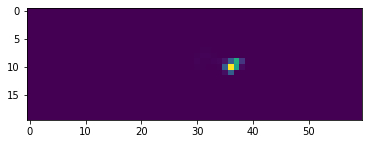

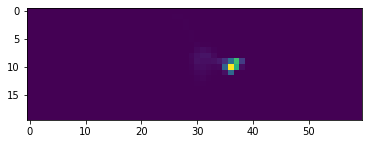

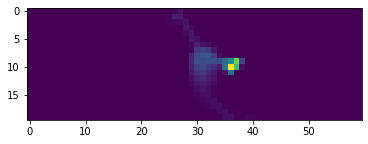

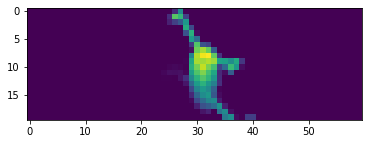

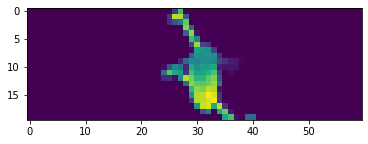

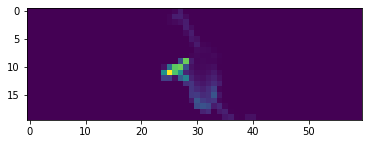

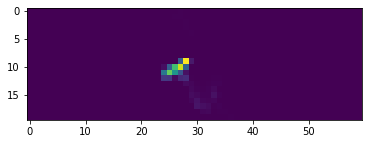

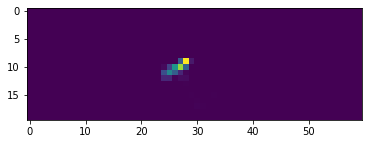

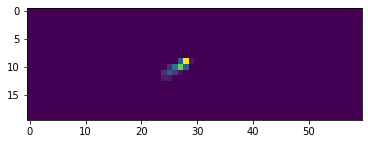

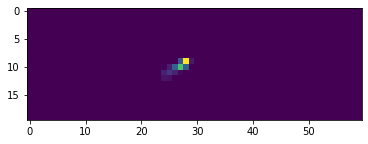

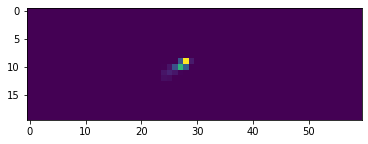

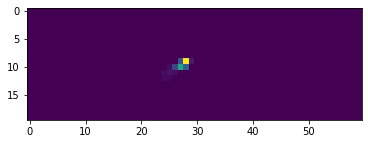

0.0
#####################


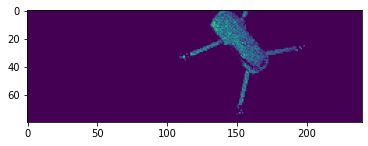

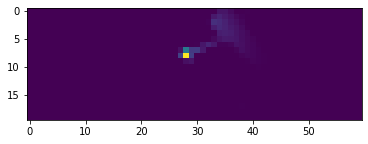

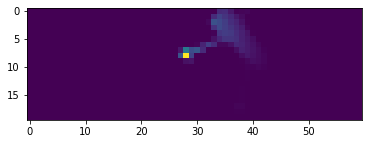

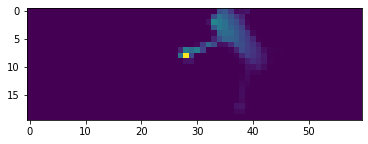

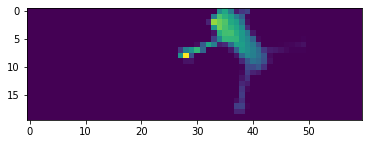

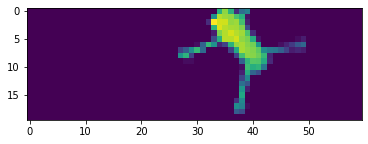

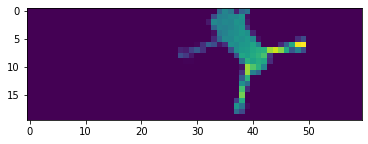

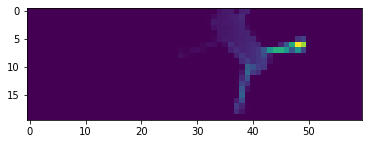

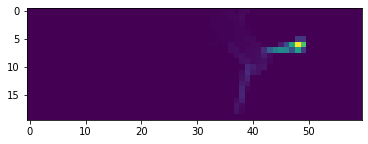

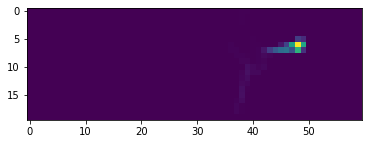

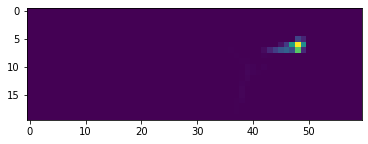

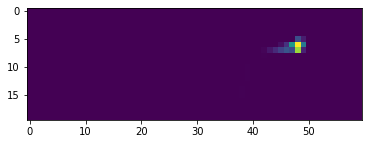

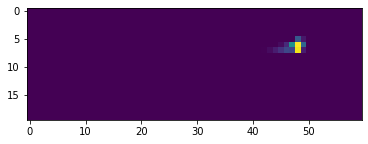

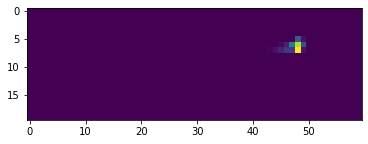

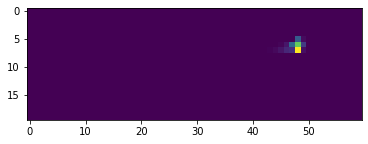

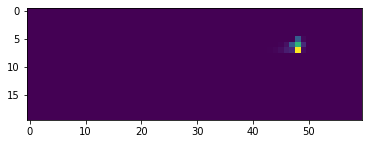

0.0
(136798, 80, 240, 1)
(136798, 20, 60, 15, 1)
(136798, 1)


In [3]:
#shuffle training data
randomize = np.arange(np.shape(train_labels)[0])

np.random.shuffle(randomize)

inten_training_data = inten_training_data[randomize]
depth_training_data = depth_training_data[randomize]
train_labels = train_labels[randomize]

#check training data
#plt.imshow(inten_training_data[0,:,:,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,0,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,1,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,2,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,3,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,4,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,5,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,6,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,7,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,8,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,9,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,10,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,11,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,12,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,13,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[0,:,:,14,0]*20.0)
#plt.show()


#print(train_labels[0,0])
#print("#####################")

#plt.imshow(inten_training_data[100,:,:,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,0,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,1,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,2,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,3,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,4,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,5,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,6,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,7,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,8,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,9,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,10,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,11,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,12,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,13,0]*20.0)
#plt.show()
#plt.imshow(depth_training_data[100,:,:,14,0]*20.0)
#plt.show()


In [4]:
#wandb.init(project="W_N_I_A_H_O_B_O_W_M_C_A_C_L_M_A",config={"hyper": "parameter"}) # initialize weights and biases if in use

depth_inputs = Input(shape = (20,60,15,1))#20x60x15x1
depth_C1 = Conv3D(32, (3, 3,3), activation = 'relu',padding='same',data_format="channels_last")(depth_inputs)
depth_C2 = Conv3D(32, (3, 3,3), activation = 'relu',padding='same',data_format="channels_last")(depth_C1)

print(depth_C1.shape)
depth_MP_1 = MaxPooling3D(pool_size=(1, 1,3),padding='same')(depth_C2)
print(depth_MP_1.shape)
depth_C4 = Conv3D(32, (3, 3,3), activation = 'relu',padding='same',data_format="channels_last")(depth_MP_1)
depth_C5 = Conv3D(32, (3, 3,3), activation = 'relu',padding='same',data_format="channels_last")(depth_C4)

print(depth_C2.shape)
depth_MP_2 = MaxPooling3D(pool_size=(1, 1,5),padding='same')(depth_C5)
print(depth_MP_2.shape)
depth_MP_2 = squeeze(depth_MP_2,3)


inten_inputs = Input(shape = (80,240,1))#80x240x1
inten_C1 = Conv2D(32, (3, 3), activation = 'relu',padding='same',data_format="channels_last")(inten_inputs)
inten_C2 = Conv2D(32, (3, 3), activation = 'relu',padding='same',data_format="channels_last")(inten_C1)

print(inten_C1.shape)
inten_MP_1 = MaxPooling2D(pool_size=(4, 4),padding='same')(inten_C2)
print(inten_MP_1.shape)

joined = concatenate([inten_MP_1,depth_MP_2],axis=3)
print(joined.shape)


joined_C1 = Conv2D(32, (3, 3), activation = 'relu',padding='same',data_format="channels_last")(joined)
joined_C2 = Conv2D(32, (3, 3), activation = 'relu',padding='same',data_format="channels_last")(joined_C1)

print(joined_C2.shape)
joined_MP_1 = MaxPooling2D(pool_size=(4, 4),padding='same')(joined_C2)
print(joined_MP_1.shape)
joined_C4 = Conv2D(32, (3, 3), activation = 'relu',padding='same',data_format="channels_last")(joined_MP_1)
joined_C5 = Conv2D(32, (3, 3), activation = 'relu',padding='same',data_format="channels_last")(joined_C4)

print("joined_C5")
print(joined_C5.shape)
joined_MP_2 = MaxPooling2D(pool_size=(5, 5),padding='same')(joined_C5)


final_flat = Flatten()(joined_MP_2)


dense_1 = Dense(64,activation='relu')(final_flat)

identi = Dense(1, activation = 'sigmoid')(final_flat)

identi_model = Model(inputs = [inten_inputs,depth_inputs],outputs = identi)

print(len(inten_training_data))

print(identi_model.summary())

(None, 20, 60, 15, 32)
(None, 20, 60, 5, 32)
(None, 20, 60, 15, 32)
(None, 20, 60, 1, 32)
(None, 80, 240, 32)
(None, 20, 60, 32)
(None, 20, 60, 64)
(None, 20, 60, 32)
(None, 5, 15, 32)
joined_C5
(None, 5, 15, 32)
136798
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20, 60, 15,  0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 20, 60, 15, 3 896         input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 20, 60, 15, 3 27680       conv3d[0][0]                     
________________________________________________________________________

In [5]:
#Hyper-parameters and fitting

identi_model.compile(loss='binary_crossentropy',optimizer = "Adam",metrics=['accuracy'])

checkpoint_filepath = '/Put_File_Path_Here/'# checkpoints to save network

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='loss', mode='min', save_best_only=True)

identi_model.fit([inten_training_data,depth_training_data], train_labels, batch_size=128, epochs=100,validation_data=([inten_testing_data,depth_testing_data], test_labels), callbacks=[model_checkpoint_callback])

K.clear_session()# Prevents GPU memory leakage

Epoch 1/100
1069/1069 [==============================] - 188s 164ms/step - loss: 0.0383 - accuracy: 0.9832 - val_loss: 4.4702e-05 - val_accuracy: 1.0000
INFO:tensorflow:Assets written to: /home/sjs2001/final_trained_models/Full_Ang/Small_Shifted_Inspire/Identification/assets
Epoch 2/100
1069/1069 [==============================] - 172s 161ms/step - loss: 9.5632e-04 - accuracy: 0.9997 - val_loss: 1.0812e-05 - val_accuracy: 1.0000
INFO:tensorflow:Assets written to: /home/sjs2001/final_trained_models/Full_Ang/Small_Shifted_Inspire/Identification/assets
Epoch 3/100
1069/1069 [==============================] - 172s 161ms/step - loss: 2.5092e-05 - accuracy: 1.0000 - val_loss: 7.2513e-06 - val_accuracy: 1.0000
INFO:tensorflow:Assets written to: /home/sjs2001/final_trained_models/Full_Ang/Small_Shifted_Inspire/Identification/assets
Epoch 4/100
1069/1069 [==============================] - 171s 160ms/step - loss: 8.0429e-06 - accuracy: 1.0000 - val_loss: 8.0774e-07 - val_accuracy: 1.0000
INFO:te

In [6]:
#Sanity checking network predictions

prediction_0 = identi_model.predict([inten_training_data[:,:,:,:],depth_training_data[:,:,:,:,:]])

end_num = 5

for i in range(0,end_num,1):

    print("truth")
    print(train_labels[i,0])
    print("prediction")
    print(prediction_0[i,0])
    


truth
1.0
prediction
1.0
truth
0.0
prediction
2.2962368e-12
truth
0.0
prediction
2.3120592e-15
truth
0.0
prediction
5.2261684e-16
truth
1.0
prediction
1.0


In [9]:
#Sanity checking network predictions

prediction_0 = identi_model.predict([inten_testing_data[:,:,:,:],depth_testing_data[:,:,:,:,:]])

start_num = 700
end_num = 5

for i in range(start_num,start_num+end_num,1):

    print("truth")
    print(test_labels[i,0])
    print("prediction")
    print(prediction_0[i,0])

truth
1.0
prediction
1.0
truth
1.0
prediction
1.0
truth
1.0
prediction
1.0
truth
1.0
prediction
1.0
truth
1.0
prediction
1.0
